In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

## STEP 1 :: LOAD DATASET

In [2]:
os.chdir('D:\\DL and ML Practical Tutorials - Package\\Project 5')

## Import Dataset

In [3]:
with open("./traffic-signs-data/train.p",mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/test.p",mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open("./traffic-signs-data/valid.p",mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [4]:
x_train , y_train = train['features'] ,train['labels']
x_validation , y_validation = valid['features'] ,valid['labels']
x_test , y_test = test['features'] ,test['labels']

In [5]:
x_train.shape ,y_train.shape

((34799, 32, 32, 3), (34799,))

In [6]:
x_validation.shape , y_validation.shape

((4410, 32, 32, 3), (4410,))

In [7]:
x_test.shape , y_test.shape

((12630, 32, 32, 3), (12630,))

## STEP 2 :: IMAGE EXPLORATION

1

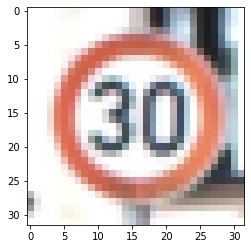

In [8]:
i = 2304
plt.imshow(x_train[i])
y_train[i]

22

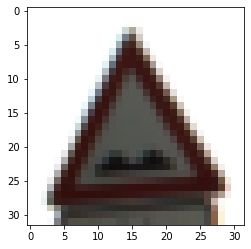

In [9]:
i = 656
plt.imshow(x_validation[i])
y_validation[i]             # it is showing, image is belonged to which class

## STEP 3 :: DATA PREPARATION

### just shuffle the data ,because chance of overfitting the model

In [10]:
from sklearn.utils import shuffle
x_train,y_train =shuffle(x_train,y_train)

In [11]:
x_train_gray = np.sum(x_train/3 ,axis=3 ,keepdims=True)
x_test_gray = np.sum(x_test/3 , axis=3 ,keepdims= True)
x_valid_gray = np.sum(x_validation/3 , axis=3 ,keepdims= True)

In [12]:
x_train_gray.shape, x_test_gray.shape, x_valid_gray.shape    # all the colour images change in gray image,,its only one axis

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

## Now Make Normalize the Data

In [13]:
x_train_gray_norm = (x_train_gray -128)/128
x_test_gray_norm = (x_test_gray -128)/128
x_valid_gray_norm = (x_valid_gray -128)/128

In [14]:
x_train_gray_norm 

array([[[[-0.23697917],
         [-0.24739583],
         [-0.20052083],
         ...,
         [-0.3671875 ],
         [-0.31510417],
         [-0.11458333]],

        [[ 0.0078125 ],
         [ 0.02083333],
         [-0.06510417],
         ...,
         [-0.3046875 ],
         [-0.2421875 ],
         [-0.125     ]],

        [[ 0.31510417],
         [ 0.27604167],
         [ 0.27864583],
         ...,
         [-0.10416667],
         [-0.1328125 ],
         [-0.02083333]],

        ...,

        [[ 0.3046875 ],
         [ 0.30729167],
         [ 0.296875  ],
         ...,
         [ 0.25520833],
         [ 0.26041667],
         [ 0.28125   ]],

        [[ 0.26041667],
         [ 0.26302083],
         [ 0.265625  ],
         ...,
         [ 0.2421875 ],
         [ 0.21614583],
         [ 0.23958333]],

        [[ 0.05729167],
         [ 0.03385417],
         [-0.00520833],
         ...,
         [-0.15364583],
         [ 0.02083333],
         [ 0.21614583]]],


       [[[-0.75260417],


In [44]:
x_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


In [45]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

## Just show the all three different types images

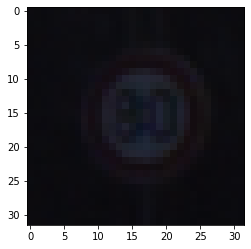

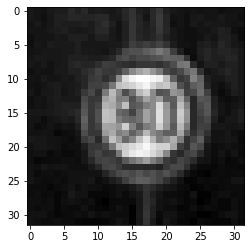

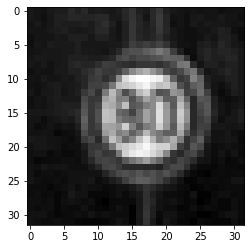

In [15]:
i= 622
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(),cmap='gray')

## STEP 4 :: MODEL PREPARATION

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D , AveragePooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6 , kernel_size =(5,5) , activation ='relu', input_shape =(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16 , kernel_size =(5,5) , activation ='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120 , activation = 'relu'))

cnn_model.add(Dense(units = 84 , activation = 'relu'))

cnn_model.add(Dense(units = 43 , activation = 'softmax'))

## now compile the model 

In [18]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr = .001), metrics=['accuracy'])

### Now fit the model and train..

In [19]:
history = cnn_model.fit(x_train_gray_norm ,y_train ,
              batch_size= 500 ,
              epochs= 20 ,verbose=1 ,
              validation_data=(x_valid_gray_norm,y_validation))


Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 28s 800us/step - loss: 3.2033 - accuracy: 0.1614 - val_loss: 2.8355 - val_accuracy: 0.2778
Epoch 2/20
34799/34799 [==============================] - 34s 988us/step - loss: 1.7607 - accuracy: 0.5061 - val_loss: 1.5309 - val_accuracy: 0.5374
Epoch 3/20
34799/34799 [==============================] - 37s 1ms/step - loss: 0.9982 - accuracy: 0.7096 - val_loss: 1.1191 - val_accuracy: 0.6646
Epoch 4/20
34799/34799 [==============================] - 36s 1ms/step - loss: 0.6985 - accuracy: 0.8016 - val_loss: 0.9581 - val_accuracy: 0.7136
Epoch 5/20
34799/34799 [==============================] - 34s 979us/step - loss: 0.5513 - accuracy: 0.8431 - val_loss: 0.7837 - val_accuracy: 0.7687
Epoch 6/20
34799/34799 [==============================] - 30s 860us/step - loss: 0.4537 - accuracy: 0.8747 - val_loss: 0.7806 - val_accuracy: 0.7599
Epoch 7/20
34799/34799 [==============================] - 30

# MODEL EVALUATION

In [20]:
score = cnn_model.evaluate(x_test_gray_norm , y_test)
print('Test Accuracy Is: {}'.format(score[1]))

12630/12630 [==============================] - 4s 337us/step
Test Accuracy Is: 0.8273159265518188


In [21]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

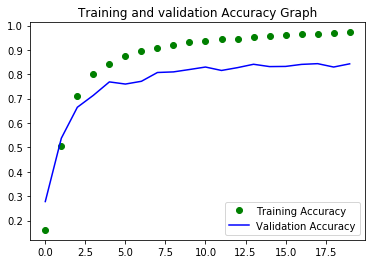

In [31]:
epochs = range(len(accuracy))

plt.plot(epochs , accuracy , 'go' , label = 'Training Accuracy')
plt.plot(epochs , val_accuracy , 'b' , label = 'Validation Accuracy')
plt.title('Training and validation Accuracy Graph')
plt.legend()


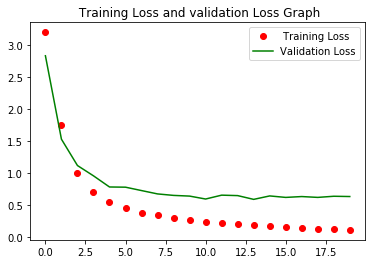

In [32]:
epochs = range(len(accuracy))

plt.plot(epochs , loss , 'ro' , label = ' Training Loss')
plt.plot(epochs , val_loss , 'g' , label = 'Validation Loss')
plt.title(' Training Loss and validation Loss Graph')
plt.legend()

## Now make the confusion matrix between true data with predicted

In [59]:
predicted_class = cnn_model.predict_classes(x_test_gray_norm)

y_true = y_test

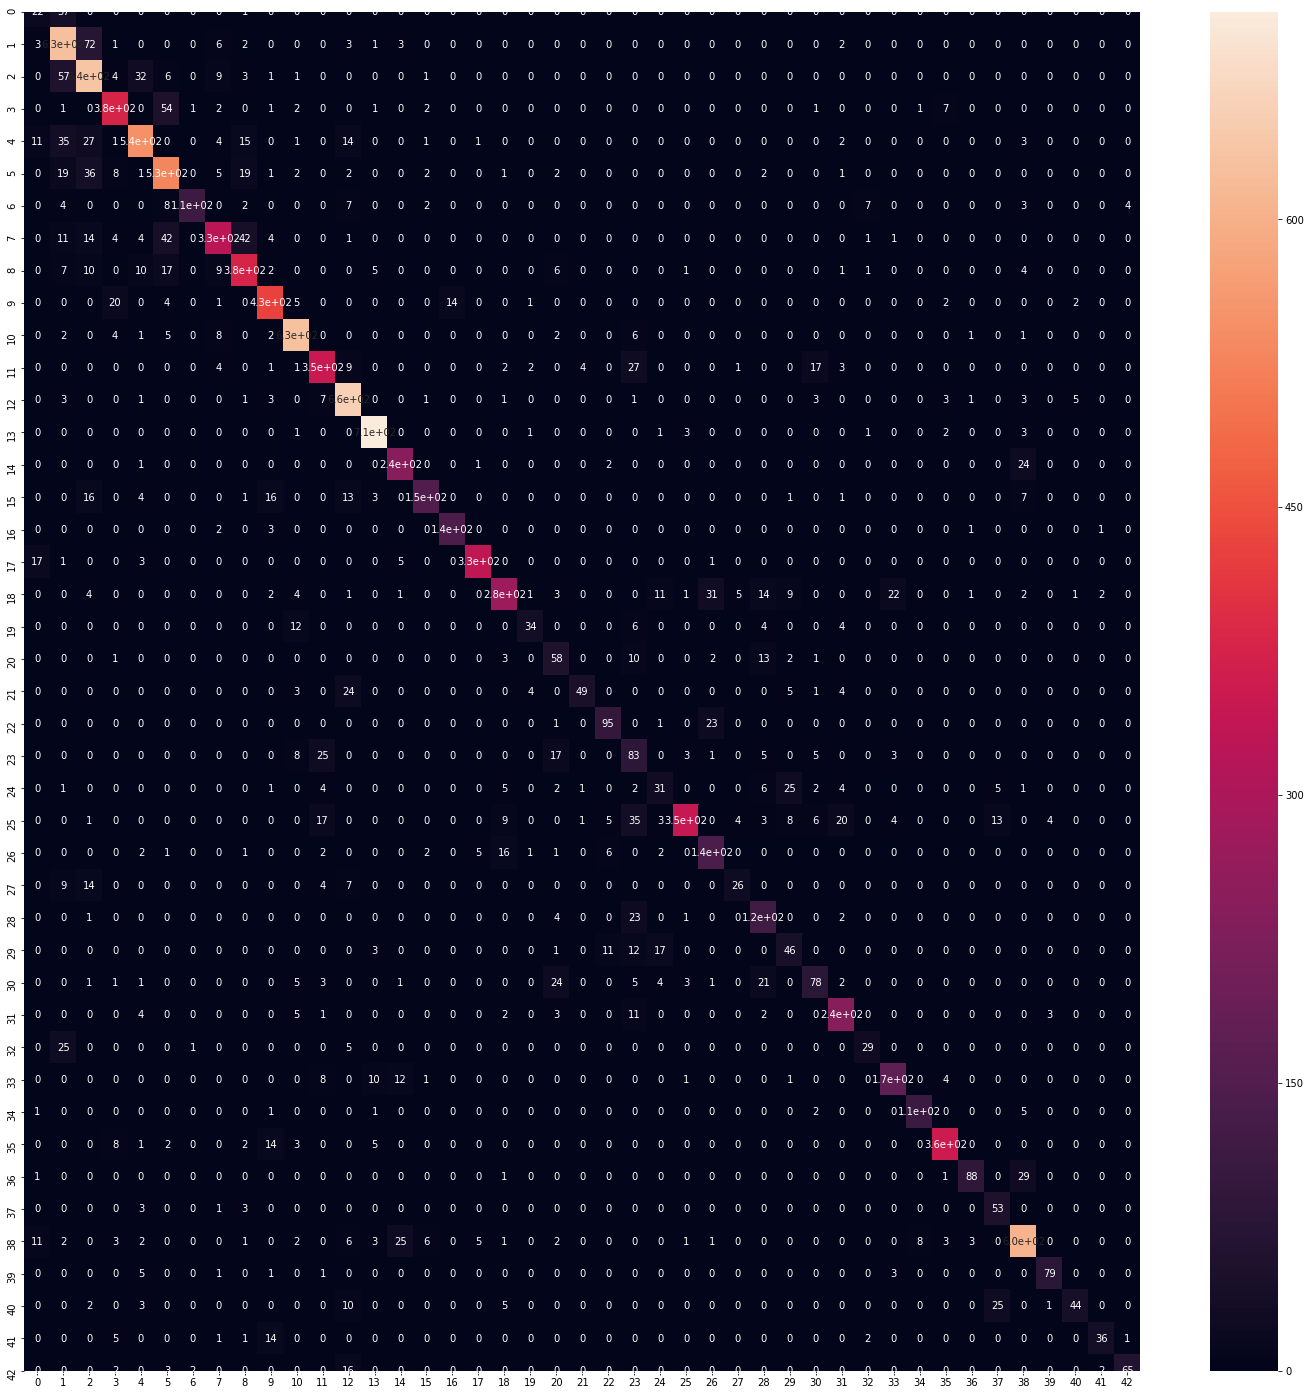

In [62]:
from sklearn.metrics import confusion_matrix
cmm = confusion_matrix(y_true , predicted_class)
plt.figure(figsize= (25,25))
sns.heatmap(cmm, annot= True)


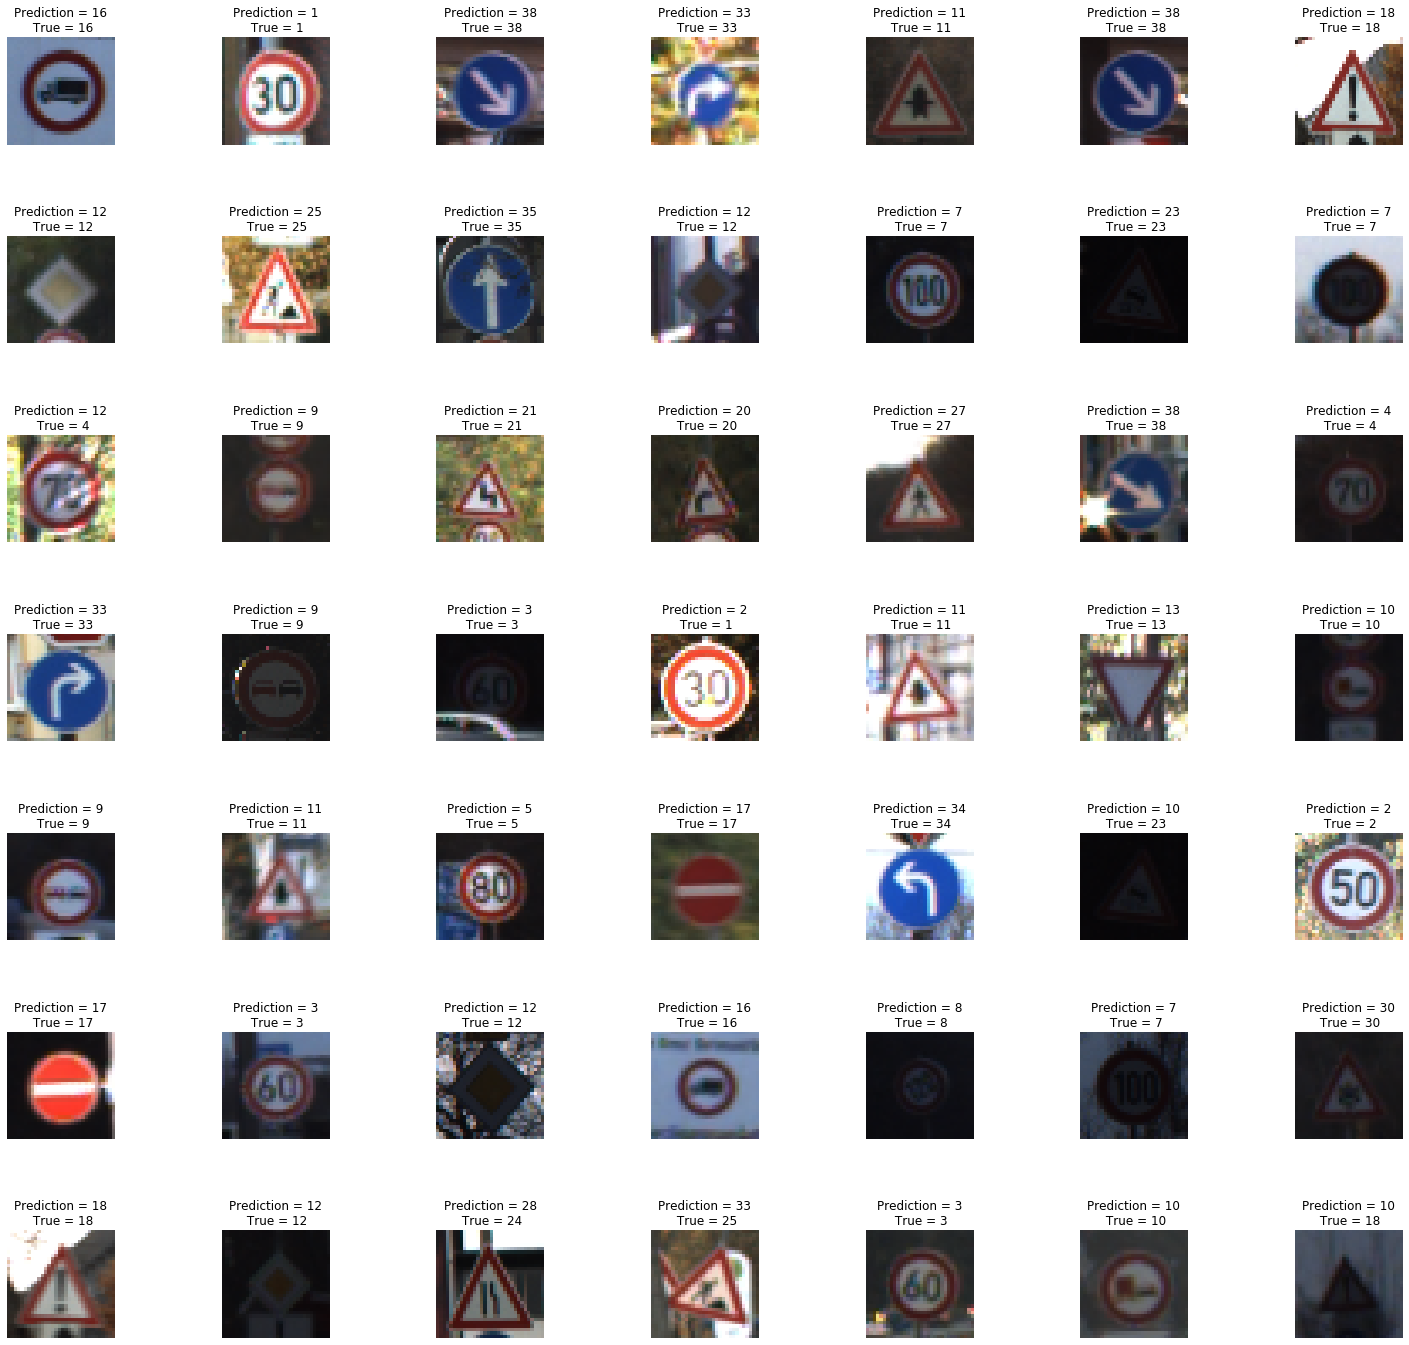

In [63]:
L= 7
W = 7

fig ,axes = plt.subplots(L , W , figsize =(25,25))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].axis('off')
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_class[i],y_true[i]))
plt.subplots_adjust(wspace=1)

# NOW THE END...THANKS FOR VISIT MY WORK